In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import tqdm
import collections
from pandas.plotting import parallel_coordinates

In [2]:
base_df = pd.read_csv("../data/output_files/final_base_df.csv")

In [3]:
varient_list = ["WILDTYPE", "Alpha B.1.1.7",
   "Beta B.1.351",
   "Gamma P.1",
   "Kappa B.1.617.1",
   "Delta B.1.617.2",
   "Lambda C.37",
   "Mu B.1.621",
   "Omicron BA.1",
   "Omicron BA.2",
   "AY.4.2",
   "C.1.2",
   "Eta B.1.525",
   "Iota B.1.526",]

In [7]:
changed_peptides = []
for i, row in tqdm.tqdm(base_df.iterrows(), total=len(base_df)):
    try:
        if(row["varient"] == "Omicron BA.1" and row["start_pos"] >= 214):
            tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"] -3)&(base_df["end_pos"] == row["end_pos"]-3)]["peptide"])[0]
        else: 
            tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"])&(base_df["end_pos"] == row["end_pos"])]["peptide"])[0]
    except:
        print("no peptide")
        tmp = ""
    if(row["peptide"] != tmp):
        changed_peptides.append(row["peptide"])
        changed_peptides.append(tmp)

 67%|██████▋   | 35802/53094 [03:09<02:10, 132.32it/s]

no peptide
no peptide
no peptide
no peptide
no peptide
no peptide
no peptide
no peptide
no peptide


100%|██████████| 53094/53094 [04:54<00:00, 180.16it/s]


In [5]:
# filtered_df = pd.read_csv("../data/output_files/filtered_df.csv")

In [12]:
base_df["varient"].replace({"original":"WILDTYPE"}, inplace=True)
print(set(base_df["varient"]))

{'Beta B.1.351', 'Delta B.1.617.2', 'Omicron BA.1', 'Omicron BA.2', 'Iota B.1.526', 'Mu B.1.621', 'C.1.2', 'Kappa B.1.617.1', 'AY.4.2', 'Alpha B.1.1.7', 'WILDTYPE', 'Eta B.1.525', 'Lambda C.37', 'Gamma P.1'}


In [13]:
filtered_df = base_df[base_df.peptide.isin(changed_peptides)]


# Chopped analysis

number of chopped by varient

In [14]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Chopped"] == True)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Chopped"] == False)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'WILDTYPE': {'chopped': 65, 'not chopped': 172}, 'Alpha B.1.1.7': {'chopped': 66, 'not chopped': 171}, 'Beta B.1.351': {'chopped': 59, 'not chopped': 178}, 'Gamma P.1': {'chopped': 62, 'not chopped': 175}, 'Kappa B.1.617.1': {'chopped': 62, 'not chopped': 175}, 'Delta B.1.617.2': {'chopped': 62, 'not chopped': 175}, 'Lambda C.37': {'chopped': 57, 'not chopped': 180}, 'Mu B.1.621': {'chopped': 59, 'not chopped': 178}, 'Omicron BA.1': {'chopped': 59, 'not chopped': 187}, 'Omicron BA.2': {'chopped': 62, 'not chopped': 175}, 'AY.4.2': {'chopped': 62, 'not chopped': 175}, 'C.1.2': {'chopped': 59, 'not chopped': 178}, 'Eta B.1.525': {'chopped': 59, 'not chopped': 178}, 'Iota B.1.526': {'chopped': 59, 'not chopped': 178}}


In [15]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, "chopped", varient_chopped_counter[var]["chopped"]])
    rows.append([var, "not chopped", varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [17]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["WILDTYPE"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["WILDTYPE"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, "chopped", 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, "not chopped",100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

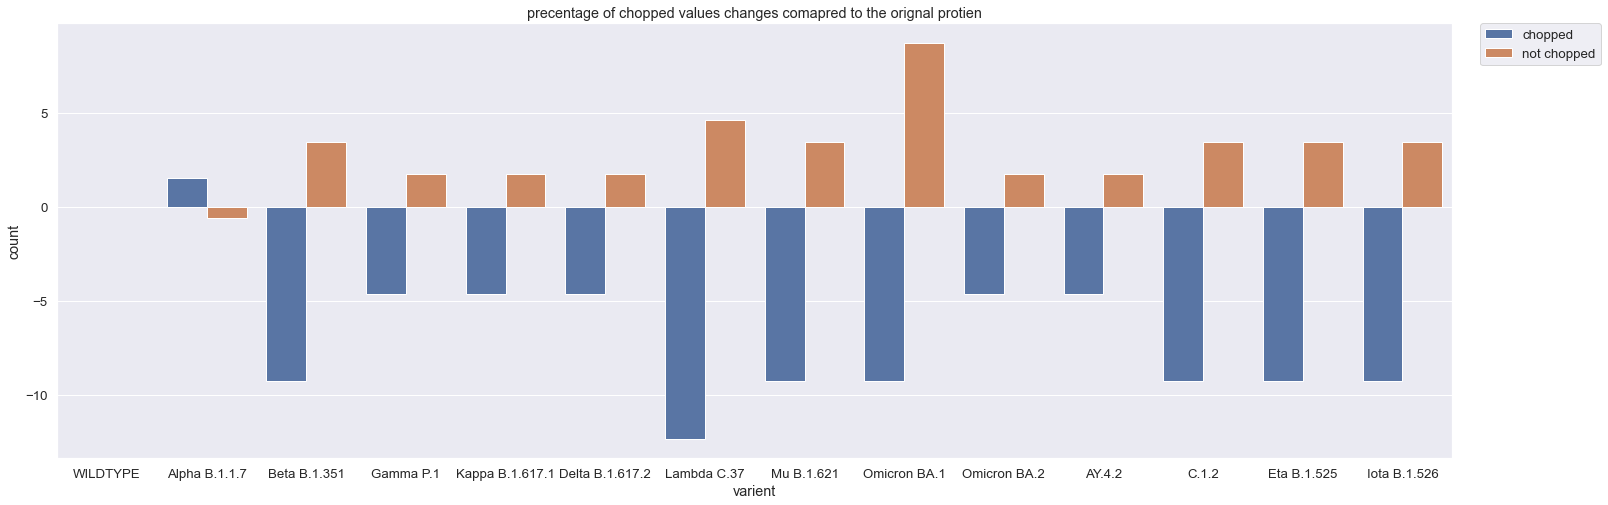

In [19]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)
# ax.set(yscale="log")
ax.set_title('precentage of chopped values changes comapred to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')


# bro

In [14]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Potential"] > 0)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Potential"] == 0)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'WILDTYPE': {'chopped': 43, 'not chopped': 194}, 'Alpha B.1.1.7': {'chopped': 45, 'not chopped': 192}, 'Beta B.1.351': {'chopped': 43, 'not chopped': 194}, 'Gamma P.1': {'chopped': 25, 'not chopped': 212}, 'Kappa B.1.617.1': {'chopped': 43, 'not chopped': 194}, 'Delta B.1.617.2': {'chopped': 43, 'not chopped': 194}, 'Lambda C.37': {'chopped': 61, 'not chopped': 176}, 'Mu B.1.621': {'chopped': 43, 'not chopped': 194}, 'Omicron BA.1': {'chopped': 43, 'not chopped': 203}, 'Omicron BA.2': {'chopped': 43, 'not chopped': 194}, 'AY.4.2': {'chopped': 43, 'not chopped': 194}, 'C.1.2': {'chopped': 43, 'not chopped': 194}, 'Eta B.1.525': {'chopped': 43, 'not chopped': 194}, 'Iota B.1.526': {'chopped': 43, 'not chopped': 194}}


In [15]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, "N-glycolized", varient_chopped_counter[var]["chopped"]])
    rows.append([var, "not N-glycolized", varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [16]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["WILDTYPE"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["WILDTYPE"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, "N-glycolized", 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, "not N-glycolized",100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

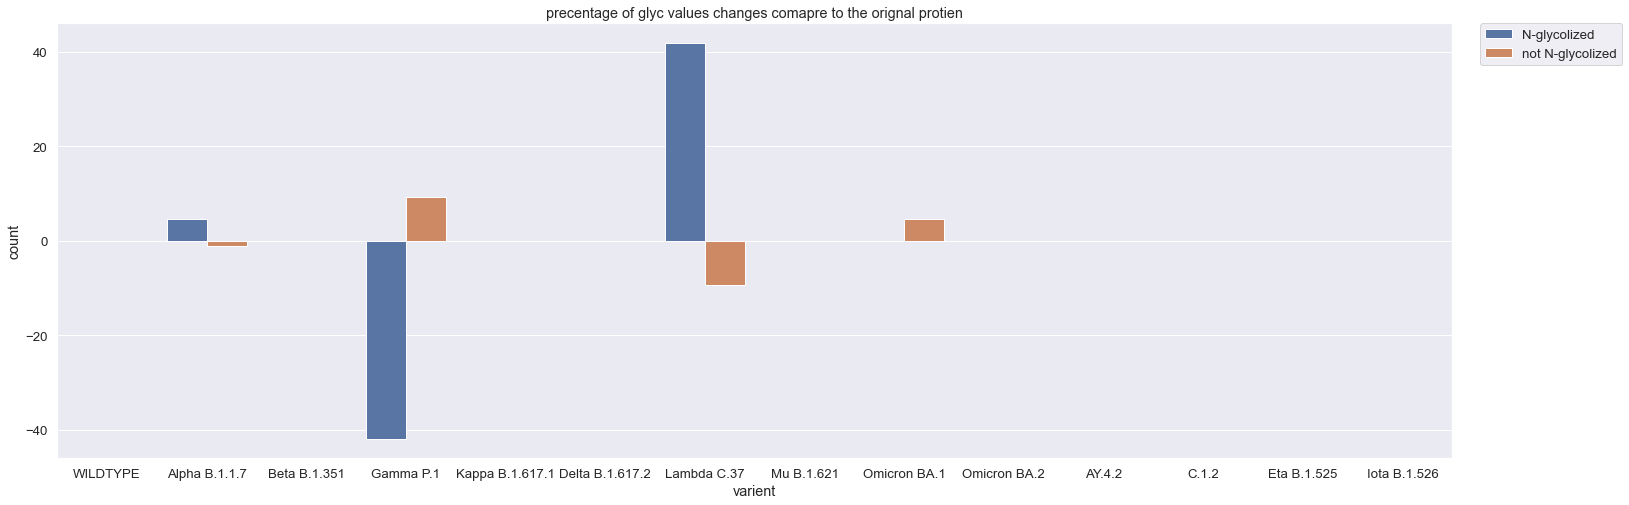

In [17]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of glyc values changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("plots/glyc-varient.png", dpi=500, bbox_inches='tight')


# NetMHCPan anlysis

boxplor ranks mean

In [22]:
MHC_TYPES = [i for i in list(set(filtered_df.columns)) if i.startswith("H")]

In [69]:
new_list = []
for i, row in filtered_df.iterrows():
    tmp_list = []
    for mhc_type in MHC_TYPES:
        #tmp_list.append(row[mhc_type])    
        new_list.append([row[mhc_type], mhc_type, row["varient"], row["peptide"]])


cols = ["rank", "mhc_type", "varient", "peptide"]
box_df = pd.DataFrame(new_list, columns=cols)
binders_df = box_df[box_df["rank"] <=2]
binders_peptides = set(binders_df["peptide"])


In [21]:
interesting_pairs = set()
for i, row in box_df.iterrows():
    if row["rank"] < 2:
        interesting_pairs.add((row["mhc_type"], row["peptide"]))

interesting_pairs = list(interesting_pairs)
print(interesting_pairs[:10])
print(len(interesting_pairs))

[('HLA-A*03:01_rank', 'IHVSGTNGTK'), ('HLA-A*03:01_rank', 'GVYFASTEK'), ('HLA-A*24:02_rank', 'KRFDNPVLPF'), ('HLA-A*26:01_rank', 'STQRLFLPF'), ('HLA-B*58:01_rank', 'LVRDLPQGF'), ('HLA-B*40:01_rank', 'REPEDLPQGF'), ('HLA-B*58:01_rank', 'IKSNIIRGW'), ('HLA-A*01:01_rank', 'SWMESEFRVY'), ('HLA-B*08:01_rank', 'NLTIRTQL'), ('HLA-A*24:02_rank', 'STQDLFLPF')]
149


In [22]:
filtered_box_df = pd.DataFrame([], columns=cols)
for mhc_type, peptide in interesting_pairs:
    interesting_rows = box_df[(box_df["peptide"] == peptide) & (box_df["mhc_type"] == mhc_type)]
    filtered_box_df = pd.concat([filtered_box_df, interesting_rows])
# filtered_box_df.drop_duplicates(inplace = True)
box_df = filtered_box_df

In [ ]:
# new_list = []
# for i, row in base_df[base_df.peptide.isin(binders_peptides)].iterrows():
#     tmp_list = []
#     for mhc_type in MHC_TYPES:
#         #tmp_list.append(row[mhc_type])    
#         new_list.append([row[mhc_type], row["varient"]])


# cols = ["rank", "varient"]
# box_df = pd.DataFrame(new_list, columns=cols)
# display(box_df)

C:\Users\itayb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


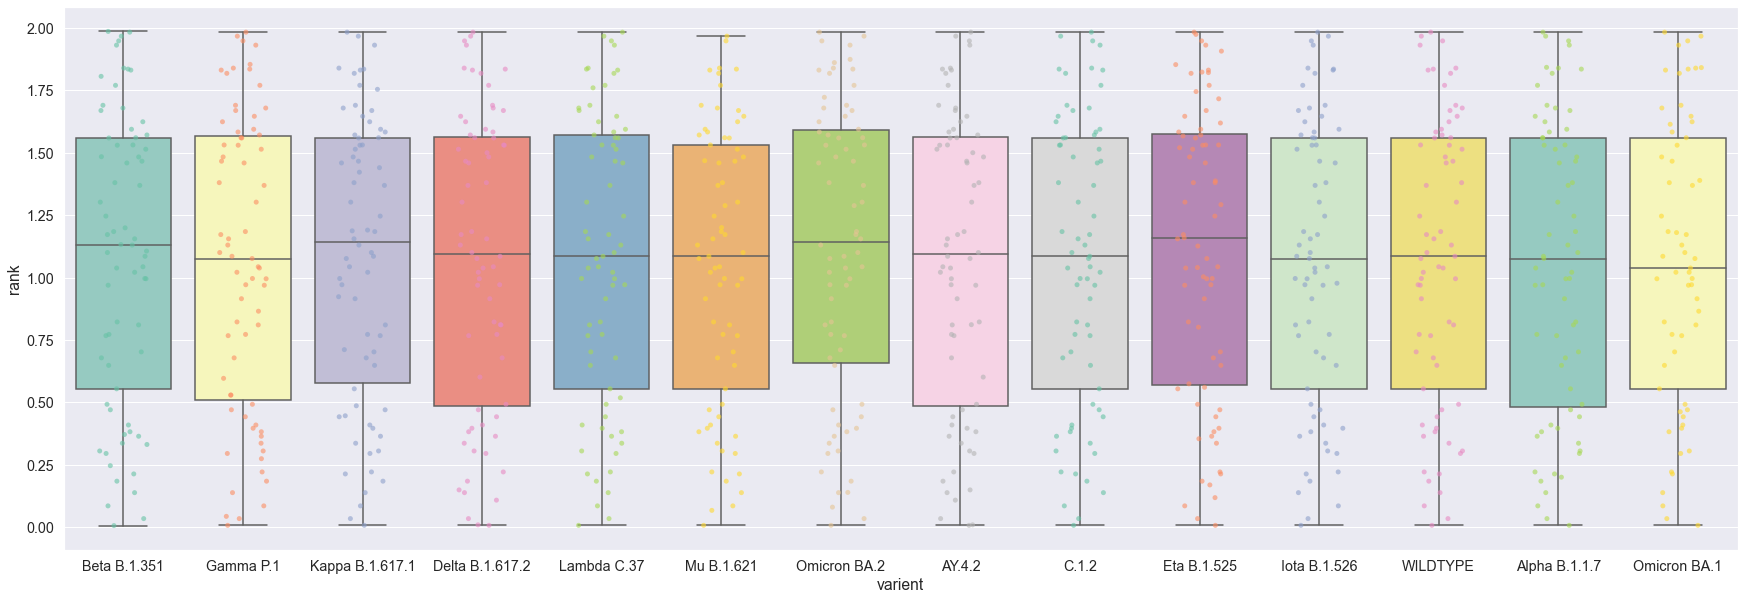

In [23]:
labels = varient_list

sns.set_theme(style="whitegrid")

sns.set(font_scale = 1.3)
plt.figure(figsize = (30,10))

ax = sns.boxplot(x="varient", y="rank",
                 data=filtered_box_df, palette="Set3")

ax = sns.stripplot(x="varient", y="rank",  data=filtered_box_df, ax=ax, palette="Set2", split=True, jitter=0.2, alpha=0.6)

plt.savefig("plots/chopped-rank-boxplot_unique_hla", dpi=500, bbox_inches='tight')

binders change

In [1]:
varient_binders_dict = {}
for var in varient_list:
    if(var == "WILDTYPE"):
        varient_binders_dict["WILDTYPE"] = {"binder": len(box_df[(box_df["varient"] == var) & (box_df["rank"] <=2)]), "not binder":len(box_df[(box_df["varient"] == var) & (box_df["rank"] >2)])}
    else:
        varient_binders_dict[var] = {"binder": len(box_df[(box_df["varient"] == var) & (box_df["rank"] <=2)]), "not binder":len(box_df[(box_df["varient"] == var) & (box_df["rank"] >2)])}

print(varient_binders_dict)

NameError: name 'varient_list' is not defined

In [32]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_binders_dict:
    rows.append([var, "strong", varient_binders_dict[var]["binder"]])
    rows.append([var, "non", varient_binders_dict[var]["not binder"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [26]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_binders_dict["WILDTYPE"]["binder"]
original_non_chopped_counter = varient_binders_dict["WILDTYPE"]["not binder"]
for var in varient_binders_dict:
    chopped_counter = varient_binders_dict[var]["binder"]
    non_chopped_counter = varient_binders_dict[var]["not binder"]
    rows.append([var, "strong", 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, "not_binder",100*non_chopped_counter/original_non_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

ZeroDivisionError: division by zero

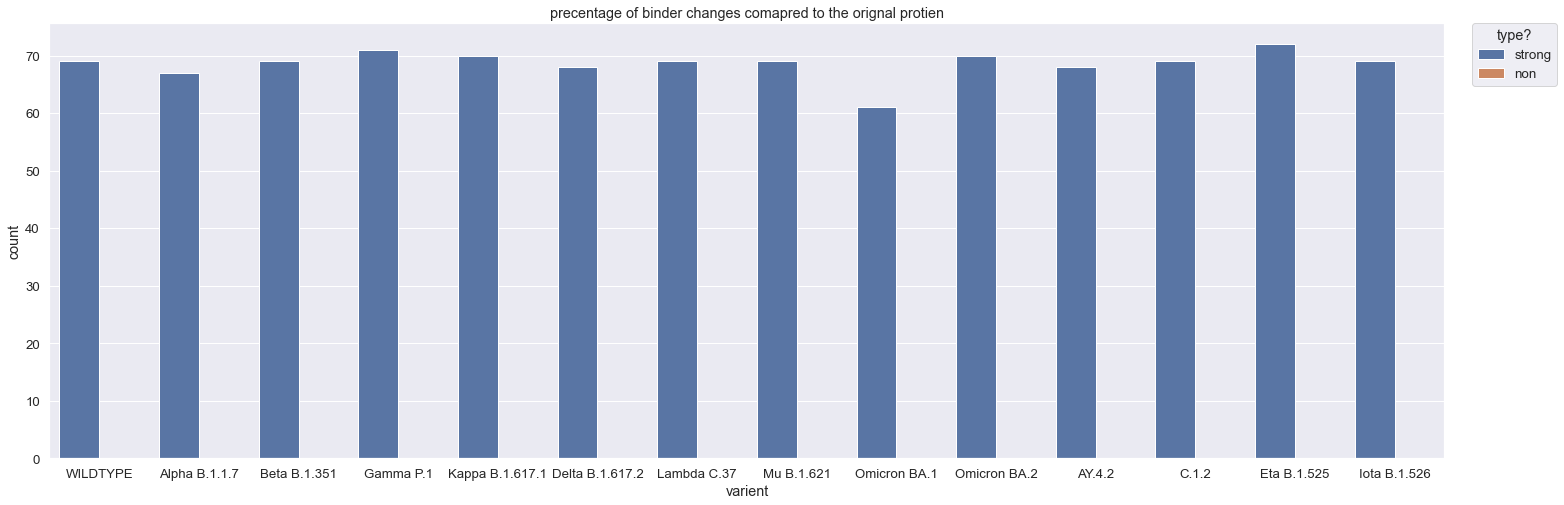

In [27]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of binder changes comapred to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="type?")
plt.savefig("plots/varient-binders-change.png", dpi=500, bbox_inches='tight')


In [33]:
def get_tupels(base_df):
    touples_list = []
    for i, row in base_df.iterrows():
        touples_list.append((row["start_pos"], row["end_pos"]))
    return touples_list

In [72]:
binder_for_added_df = base_df[base_df.peptide.isin(binders_peptides)]
display(binder_for_added_df)

Unnamed: 0     peptide  start_pos  end_pos          varient  Chopped  \
39             39    FLVLLPLV          4       11    Alpha B.1.1.7    False   
40             40    FLVLLPLV          4       11     Beta B.1.351    False   
41             41    FLVLLPLV          4       11        Gamma P.1    False   
42             42    FLVLLPLV          4       11  Kappa B.1.617.1    False   
43             43    FLVLLPLV          4       11  Delta B.1.617.2    False   
...           ...         ...        ...      ...              ...      ...   
53069       53069  VLHSTQRLFL         47       56      Eta B.1.525    False   
53071       53071  HSTQRLFLPF         49       58      Eta B.1.525    False   
53072       53072  STQRLFLPFF         50       59      Eta B.1.525    False   
53075       53075  RLFLPFFSNV         53       62      Eta B.1.525     True   
53079       53079    FLFLLPLV          4       11     Iota B.1.526    False   

       HLA-B*58:01_rank  HLA-A*01:01_rank  HLA-A*24:02_rank  HLA-B*40:01_rank  \
39               62.500            41.167            29.429            55.000   
40               62.500            41.167            29.429            55.000   
41               62.500            41.167            29.429            55.000   
42               62.500            41.167            29.429            55.000   
43               62.500            41.167            29.429            55.000   
...                 ...               ...               ...               ...   
53069            18.161            21.403             8.601            21.267   
53071             1.159             5.862             6.028            33.250   
53072             1.716             4.851             4.484            18.615   
53075            24.780            39.154             4.841            24.909   
53079            55.667            31.042            25.667            47.000   

       HLA-B*08:01_rank  HLA-B*27:05_rank  HLA-A*03:01_rank  HLA-A*26:01_rank  \
39               13.180            53.889            54.375            33.200   
40               13.180            53.889            54.375            33.200   
41               13.180            53.889            54.375            33.200   
42               13.180            53.889            54.375            33.200   
43               13.180            53.889            54.375            33.200   
...                 ...               ...               ...               ...   
53069             8.946            19.415            11.736            28.647   
53071            10.848            19.302            20.913             8.238   
53072            23.606            12.516            14.703             7.569   
53075            27.239             9.779             6.327            23.765   
53079             8.554            37.333            29.231            27.455   

       HLA-B*39:01_rank  HLA-B*07:02_rank  HLA-A*02:01_rank  HLA-B*15:01_rank  \
39               29.471            58.889             1.483            34.400   
40               29.471            58.889             1.483            34.400   
41               29.471            58.889             1.483            34.400   
42               29.471            58.889             1.483            34.400   
43               29.471            58.889             1.483            34.400   
...                 ...               ...               ...               ...   
53069             1.974            10.011             2.265             6.845   
53071            30.867            15.741            60.000             6.839   
53072            36.625            26.269            40.625             1.823   
53075            22.318            26.538             0.574            13.387   
53079            25.964            48.750             0.977            24.220   

       Potential  
39           0.0  
40           0.0  
41           0.0  
42           0.0  
43           0.0  
...          ...  
53069 

In [73]:
added_poistions = set(get_tupels(binder_for_added_df)) - set(get_tupels(binder_for_added_df[binder_for_added_df["varient"] == "original"])) 

In [74]:
pos_list = []
for pos in added_poistions:
    start_pos, end_pos = pos

    for p in binder_for_added_df[(base_df["start_pos"] == start_pos) & (binder_for_added_df["end_pos"] == end_pos)]["Unnamed: 0"]:
        pos_list.append(int(p))
    



C:\Users\itayb\AppData\Local\Temp/ipykernel_9136/3016727921.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for p in binder_for_added_df[(base_df["start_pos"] == start_pos) & (binder_for_added_df["end_pos"] == end_pos)]["Unnamed: 0"]:


In [75]:
added_df = base_df[base_df["Unnamed: 0"].isin(pos_list)]


In [76]:
display(added_df)

Unnamed: 0     peptide  start_pos  end_pos          varient  Chopped  \
39             39    FLVLLPLV          4       11    Alpha B.1.1.7    False   
40             40    FLVLLPLV          4       11     Beta B.1.351    False   
41             41    FLVLLPLV          4       11        Gamma P.1    False   
42             42    FLVLLPLV          4       11  Kappa B.1.617.1    False   
43             43    FLVLLPLV          4       11  Delta B.1.617.2    False   
...           ...         ...        ...      ...              ...      ...   
53069       53069  VLHSTQRLFL         47       56      Eta B.1.525    False   
53071       53071  HSTQRLFLPF         49       58      Eta B.1.525    False   
53072       53072  STQRLFLPFF         50       59      Eta B.1.525    False   
53075       53075  RLFLPFFSNV         53       62      Eta B.1.525     True   
53079       53079    FLFLLPLV          4       11     Iota B.1.526    False   

       HLA-B*58:01_rank  HLA-A*01:01_rank  HLA-A*24:02_rank  HLA-B*40:01_rank  \
39               62.500            41.167            29.429            55.000   
40               62.500            41.167            29.429            55.000   
41               62.500            41.167            29.429            55.000   
42               62.500            41.167            29.429            55.000   
43               62.500            41.167            29.429            55.000   
...                 ...               ...               ...               ...   
53069            18.161            21.403             8.601            21.267   
53071             1.159             5.862             6.028            33.250   
53072             1.716             4.851             4.484            18.615   
53075            24.780            39.154             4.841            24.909   
53079            55.667            31.042            25.667            47.000   

       HLA-B*08:01_rank  HLA-B*27:05_rank  HLA-A*03:01_rank  HLA-A*26:01_rank  \
39               13.180            53.889            54.375            33.200   
40               13.180            53.889            54.375            33.200   
41               13.180            53.889            54.375            33.200   
42               13.180            53.889            54.375            33.200   
43               13.180            53.889            54.375            33.200   
...                 ...               ...               ...               ...   
53069             8.946            19.415            11.736            28.647   
53071            10.848            19.302            20.913             8.238   
53072            23.606            12.516            14.703             7.569   
53075            27.239             9.779             6.327            23.765   
53079             8.554            37.333            29.231            27.455   

       HLA-B*39:01_rank  HLA-B*07:02_rank  HLA-A*02:01_rank  HLA-B*15:01_rank  \
39               29.471            58.889             1.483            34.400   
40               29.471            58.889             1.483            34.400   
41               29.471            58.889             1.483            34.400   
42               29.471            58.889             1.483            34.400   
43               29.471            58.889             1.483            34.400   
...                 ...               ...               ...               ...   
53069             1.974            10.011             2.265             6.845   
53071            30.867            15.741            60.000             6.839   
53072            36.625            26.269            40.625             1.823   
53075            22.318            26.538             0.574            13.387   
53079            25.964            48.750             0.977            24.220   

       Potential  
39           0.0  
40           0.0  
41           0.0  
42           0.0  
43           0.0  
...          ...  
53069 

In [54]:
len(added_df[added_df["Chopped"] == True])/len(added_df)
len(added_df[added_df["Chopped"] == True])/len(added_df)

0.24045686804929367

In [55]:
rows=[]

rows.append(["chopped", len(added_df[added_df["Chopped"] == True])/len(added_df)*100])
rows.append(["n-glycolized", len(added_df[added_df["Potential"] > 0])/len(added_df)*100])

new_df_df = pd.DataFrame(rows, columns=["type", "precentage"])

print(rows)

[['chopped', 24.045686804929367], ['n-glycolized', 18.15449353772167]]


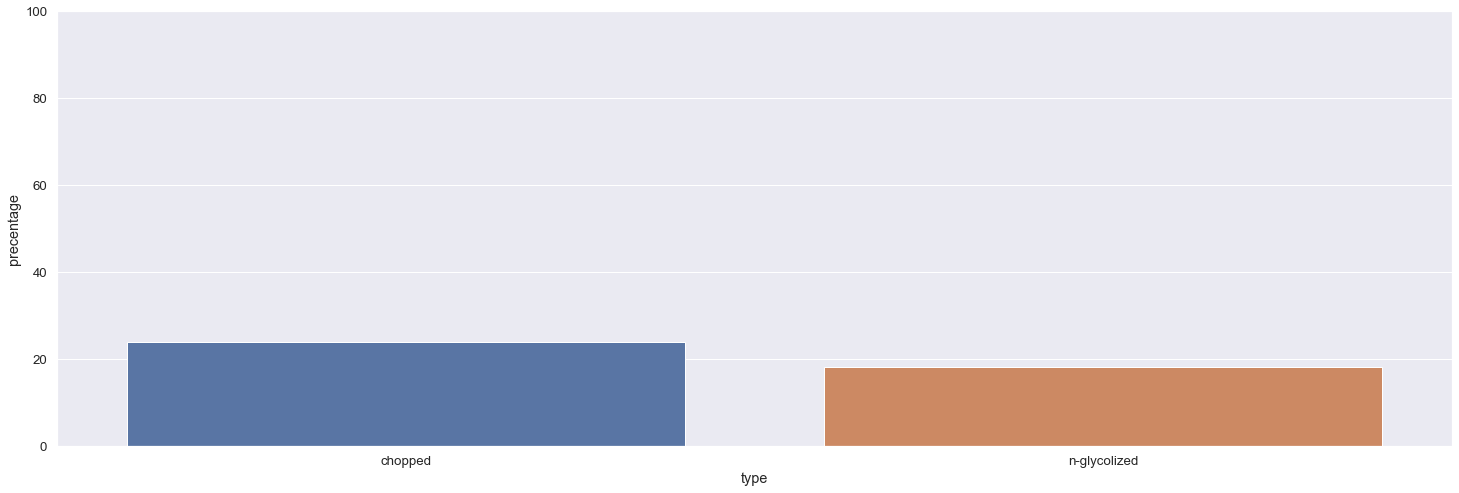

In [56]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)

ax = sns.barplot(x="type", y="precentage", data=new_df_df)
ax.set(ylim=(0,100))


plt.savefig("plots/lalalalaal.png", dpi=500, bbox_inches='tight')

In [77]:
deleted_poistions = []
for varient in varient_list:
    print(varient)
    deleted_poistions.extend(list(set(get_tupels(binder_for_added_df[binder_for_added_df["varient"] == "WILDTYPE"])) -set(get_tupels(binder_for_added_df[binder_for_added_df["varient"]== varient]))))

WILDTYPE
Alpha B.1.1.7
Beta B.1.351
Gamma P.1
Kappa B.1.617.1
Delta B.1.617.2
Lambda C.37
Mu B.1.621
Omicron BA.1
Omicron BA.2
AY.4.2
C.1.2
Eta B.1.525
Iota B.1.526


In [78]:
deleted_poistions

[(62, 70),
 (68, 77),
 (65, 73),
 (149, 157),
 (89, 98),
 (88, 97),
 (212, 220),
 (249, 258),
 (213, 222),
 (207, 216),
 (250, 258),
 (213, 220),
 (211, 220),
 (208, 216)]

In [85]:
added_delted_df = pd.DataFrame([["insertions", len(added_df)], ["deletions", len(deleted_poistions)]], columns=["type", "count"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


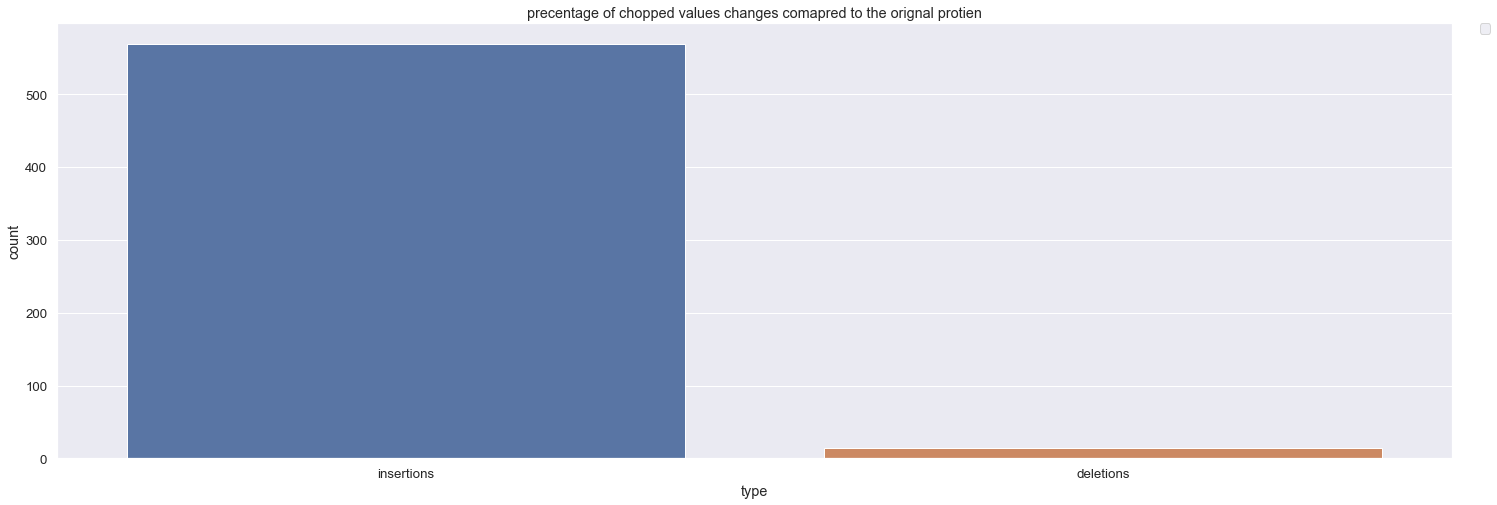

In [86]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="type", y="count", data=added_delted_df)

ax.set_title('precentage of chopped values changes comapred to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')

# MHCPAN by category

In [ ]:
def get_binder_type(val):
    if val < 2:
        return "Strong Binder"
    elif val < 5:
        return "Weak Binder"
    else:
        return "Non Binder"

In [ ]:
mhcpan_by_category = collections.defaultdict(dict)

for i, row in tqdm.tqdm(filtered_df.iterrows(), total=len(filtered_df)):
    for mhc_type in MHC_TYPES:
        if "Strong Binder" not in mhcpan_by_category[mhc_type]:
            mhcpan_by_category[mhc_type]["Strong Binder"] = 0
        if "Weak Binder" not in mhcpan_by_category[mhc_type]:
            mhcpan_by_category[mhc_type]["Weak Binder"] = 0
        if "Non Binder" not in mhcpan_by_category[mhc_type]:
            mhcpan_by_category[mhc_type]["Non Binder"] = 0

        val = row[mhc_type]
        mhcpan_by_category[mhc_type][get_binder_type(val)] += 1

In [ ]:
mhc_rows = [[mhc_type,"tt", mhcpan_by_category[mhc_type]["Strong Binder"],
             mhcpan_by_category[mhc_type]["Weak Binder"],
             mhcpan_by_category[mhc_type]["Non Binder"]] for mhc_type in MHC_TYPES]
mhc_cols = ["mhc_type","tt", "Strong Binder", "Weak Binder", "Non Binder"]

mhcpan_by_category_df = pd.DataFrame(mhc_rows, columns=mhc_cols)

In [ ]:
# ax.set(yscale="log")
# ax = sns.barplot(stacked=True, data=mhcpan_by_category_df)
ax = mhcpan_by_category_df.set_index('mhc_type').plot(kind='bar', stacked=True)
ax.set(yscale="log")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("plots/mhc_type_by_category_log", dpi=500, bbox_inches='tight')


# Bar Plot for chopped and mhcpan

In [ ]:


mhcpan_by_category = collections.defaultdict(dict)
for i, row in tqdm.tqdm(filtered_df.iterrows(), total=len(filtered_df)):
    chopped = row["Chopped"]
    if "Strong Binder" not in mhcpan_by_category[chopped]:
        mhcpan_by_category[chopped]["Strong Binder"] = 0
    if "Weak Binder" not in mhcpan_by_category[chopped]:
        mhcpan_by_category[chopped]["Weak Binder"] = 0
    if "Non Binder" not in mhcpan_by_category[chopped]:
        mhcpan_by_category[chopped]["Non Binder"] = 0

    val = row[mhc_type]
    mhcpan_by_category[chopped][get_binder_type(val)] += 1

mhc_rows = []
for chopped in [True, False]:
    for binder_type in ["Strong Binder", "Weak Binder", "Non Binder"]:
        mhc_rows.append([chopped, binder_type, mhcpan_by_category[chopped][binder_type]])
# mhc_rows = [[mhc_type, mhcpan_by_category[mhc_type]["Strong Binder"],
#              mhcpan_by_category[mhc_type]["Weak Binder"],
#              mhcpan_by_category[mhc_type]["Non Binder"]] for mhc_type in [True, False]]
# mhc_cols = ["Chopped", "Strong Binder", "Weak Binder", "Non Binder"]
mhc_cols = ["Chopped", "Binder", "count"]

mhcpan_by_category_df = pd.DataFrame(mhc_rows, columns=mhc_cols)

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)

ax = sns.barplot(x="Chopped", y="count", hue="Binder", data=mhcpan_by_category_df)
ax.set(yscale="log")
ax.set_title('NETMHCPAN score types count by chopped type')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("plots/NETMHCPAN_score_types_count_chopped", dpi=500, bbox_inches='tight')



# Bar Plot for Glyc and mhcpan

In [ ]:


mhcpan_by_category = collections.defaultdict(dict)
for i, row in tqdm.tqdm(filtered_df.iterrows(), total=len(filtered_df)):
    chopped = row["Potential"] > 0
    if "Strong Binder" not in mhcpan_by_category[chopped]:
        mhcpan_by_category[chopped]["Strong Binder"] = 0
    if "Weak Binder" not in mhcpan_by_category[chopped]:
        mhcpan_by_category[chopped]["Weak Binder"] = 0
    if "Non Binder" not in mhcpan_by_category[chopped]:
        mhcpan_by_category[chopped]["Non Binder"] = 0

    val = row[mhc_type]
    mhcpan_by_category[chopped][get_binder_type(val)] += 1

mhc_rows = []
for chopped in [True, False]:
    for binder_type in ["Strong Binder", "Weak Binder", "Non Binder"]:
        mhc_rows.append([chopped, binder_type, mhcpan_by_category[chopped][binder_type]])
# mhc_rows = [[mhc_type, mhcpan_by_category[mhc_type]["Strong Binder"],
#              mhcpan_by_category[mhc_type]["Weak Binder"],
#              mhcpan_by_category[mhc_type]["Non Binder"]] for mhc_type in [True, False]]
# mhc_cols = ["Chopped", "Strong Binder", "Weak Binder", "Non Binder"]
mhc_cols = ["N-glycolized", "Binder", "count"]

mhcpan_by_category_df = pd.DataFrame(mhc_rows, columns=mhc_cols)

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)

ax = sns.barplot(x="N-glycolized", y="count", hue="Binder", data=mhcpan_by_category_df)
ax.set(yscale="log")
ax.set_title('NETMHCPAN score types count by N-glycolized type')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("plots/NETMHCPAN_score_types_count_glyc", dpi=500, bbox_inches='tight')


# parallel

In [23]:
binder_peptides = set()
for i, row in filtered_df[filtered_df["varient"] == "WILDTYPE"].iterrows():
    for mhc_type in MHC_TYPES:
        if(row[mhc_type] <= 2):
            binder_peptides.add(row["peptide"])

In [20]:
display(filtered_df)

Unnamed: 0  Unnamed: 0.1     peptide  start_pos  end_pos  \
0               0             0    MFVFLVLL          1        8   
1               1             1    MFVFLVLL          1        8   
2               2             2    MFVFLVLL          1        8   
3               3             3    MFVFLVLL          1        8   
4               4             4    MFVFLVLL          1        8   
...           ...           ...         ...        ...      ...   
53089       53089         53089  FVFLFLLPLV          2       11   
53090       53090         53090  VFLFLLPLVS          3       12   
53091       53091         53091  FLFLLPLVSS          4       13   
53092       53092         53092  LFLLPLVSSQ          5       14   
53093       53093         53093  FLLPLVSSQC          6       15   

               varient  Chopped  HLA-B*39:01_rank  HLA-A*02:01_rank  \
0        Alpha B.1.1.7     True            21.981            21.618   
1         Beta B.1.351     True            21.981            21.618   
2            Gamma P.1     True            21.981            21.618   
3      Kappa B.1.617.1     True            21.981            21.618   
4      Delta B.1.617.2     True            21.981            21.618   
...                ...      ...               ...               ...   
53089     Iota B.1.526    False            57.500             4.153   
53090     Iota B.1.526    False            77.500            15.627   
53091     Iota B.1.526    False            50.000             4.385   
53092     Iota B.1.526    False            75.000            26.211   
53093     Iota B.1.526    False            46.333             2.390   

       HLA-A*03:01_rank  HLA-B*15:01_rank  HLA-B*40:01_rank  HLA-B*58:01_rank  \
0                55.714            61.250              44.0            40.500   
1                55.714            61.250              44.0            40.500   
2                55.714            61.250              44.0            40.500   
3                55.714            61.250              44.0            40.500   
4                55.714            61.250              44.0            40.500   
...                 ...               ...               ...               ...   
53089            32.444            47.800              49.0            57.333   
53090            31.300            39.600              85.0            74.286   
53091            25.381            32.150              75.0            71.429   
53092            17.580            24.360              85.0            52.857   
53093            25.905            26.439              48.0            24.660   

       HLA-B*08:01_rank  HLA-A*26:01_rank  HLA-B*27:05_rank  HLA-A*01:01_rank  \
0                14.162            46.250            38.000            68.333   
1                14.162            46.250            38.000            68.333   
2                14.162            46.250            38.000            68.333   
3                14.162            46.250            38.000            68.333   
4                14.162            46.250            38.000            68.333   
...                 ...               ...               ...               ...   
53089            41.278            22.789            44.667            50.968   
53090            64.091            77.500            61.000            70.000   
53091            34.939            55.714            55.000            64.524   
53092            53.293            53.182            51.111            60.476   
53093            20.161            48.333            55.000            41.083   

       HLA-B*07:02_rank  HLA-A*24:02_rank  Potential  
0                24.484             8.903        0.0  
1                24.484             8.903        0.0  
2                24.484             8.903        0.0  
3                24.484             8.903        0.0  
4                24.484             8.903        0.0  
...                 ...               ...        ...  
53089            7

In [24]:
varients_dict = dict([(j,i ) for i, j in enumerate(varient_list)])

parallel_df = filtered_df[filtered_df.peptide.isin(binder_peptides)][MHC_TYPES + ["varient"]]
parallel_df["varient"] = parallel_df["varient"].apply(lambda x: varients_dict[x])
display(parallel_df)

HLA-B*40:01_rank  HLA-B*58:01_rank  HLA-A*03:01_rank  HLA-A*26:01_rank  \
39               55.000            62.500            54.375            33.200   
40               55.000            62.500            54.375            33.200   
41               55.000            62.500            54.375            33.200   
42               55.000            62.500            54.375            33.200   
43               55.000            62.500            54.375            33.200   
...                 ...               ...               ...               ...   
52785            36.333             1.831            34.857            15.008   
52786            36.333             1.831            34.857            15.008   
52787            36.333             1.831            34.857            15.008   
52788            36.333             1.831            34.857            15.008   
52789            36.333             1.831            34.857            15.008   

       HLA-B*39:01_rank  HLA-A*24:02_rank  HLA-B*15:01_rank  HLA-A*02:01_rank  \
39               29.471            29.429            34.400             1.483   
40               29.471            29.429            34.400             1.483   
41               29.471            29.429            34.400             1.483   
42               29.471            29.429            34.400             1.483   
43               29.471            29.429            34.400             1.483   
...                 ...               ...               ...               ...   
52785            64.000             8.100             7.676            60.000   
52786            64.000             8.100             7.676            60.000   
52787            64.000             8.100             7.676            60.000   
52788            64.000             8.100             7.676            60.000   
52789            64.000             8.100             7.676            60.000   

       HLA-B*27:05_rank  HLA-B*08:01_rank  HLA-B*07:02_rank  HLA-A*01:01_rank  \
39               53.889             13.18            58.889            41.167   
40               53.889             13.18            58.889            41.167   
41               53.889             13.18            58.889            41.167   
42               53.889             13.18            58.889            41.167   
43               53.889             13.18            58.889            41.167   
...                 ...               ...               ...               ...   
52785            35.857             41.50            36.000             6.685   
52786            35.857             41.50            36.000             6.685   
52787            35.857             41.50            36.000             6.685   
52788            35.857             41.50            36.000             6.685   
52789            35.857             41.50            36.000             6.685   

       varient  
39           1  
40           2  
41           3  
42           4  
43           5  
...        ...  
52785       10  
52786       11  
52787       12  
52788       13  
52789        0  

[509 rows x 13 columns]

In [54]:
list(filtered_df[(filtered_df["peptide"] == peptide ) & (filtered_df["varient"] == varient)][mhc_type])

[43.909]

In [46]:
mhc_dict = {}
for mhc_type in MHC_TYPES:
    u_peptides = set(filtered_df["peptide"])
    mhc_type_rows = []
    for peptide in u_peptides:
        new_row = []
        for varient in varient_list:
            new_row.append(filtered_df[(filtered_df["peptide"] == peptide ) & (filtered_df["varient"] == varient)][mhc_type])
        mhc_type_rows.append(new_row)
    mhc_dict[mhc_type] = mhc_type_rows
    
cols = []


{'HLA-B*40:01_rank': [[Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), 52858    100.0
Name: HLA-B*40:01_rank, dtype: float64, Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), 52859    100.0
Name: HLA-B*40:01_rank, dtype: float64, Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64)], [Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank, dtype: float64), Series([], Name: HLA-B*40:01_rank

In [56]:

test_df = pd.DataFrame(mhc_dict[MHC_TYPES[0]], columns=varient_list)
display(test_df)

WILDTYPE  \
0    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
1    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
2    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
3    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
4    52572    46.0
Name: HLA-B*40:01_rank, dtype: f...   
..                                                 ...   
550  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
551  18594    53.75
Name: HLA-B*40:01_rank, dtype: ...   
552  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
553  18208    75.0
Name: HLA-B*40:01_rank, dtype: f...   
554  Series([], Name: HLA-B*40:01_rank, dtype: floa...   

                                         Alpha B.1.1.7  \
0    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
1    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
2    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
3    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
4    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
..                                                 ...   
550  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
551  18582    53.75
Name: HLA-B*40:01_rank, dtype: ...   
552  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
553  18196    75.0
Name: HLA-B*40:01_rank, dtype: f...   
554  Series([], Name: HLA-B*40:01_rank, dtype: floa...   

                                          Beta B.1.351  \
0    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
1    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
2    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
3    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
4    52561    46.0
Name: HLA-B*40:01_rank, dtype: f...   
..                                                 ...   
550  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
551  18583    53.75
Name: HLA-B*40:01_rank, dtype: ...   
552  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
553  18197    75.0
Name: HLA-B*40:01_rank, dtype: f...   
554  Series([], Name: HLA-B*40:01_rank, dtype: floa...   

                                             Gamma P.1  \
0    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
1    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
2    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
3    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
4    52562    46.0
Name: HLA-B*40:01_rank, dtype: f...   
..                                                 ...   
550  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
551  18584    53.75
Name: HLA-B*40:01_rank, dtype: ...   
552  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
553  18198    75.0
Name: HLA-B*40:01_rank, dtype: f...   
554  Series([], Name: HLA-B*40:01_rank, dtype: floa...   

                                       Kappa B.1.617.1  \
0    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
1    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
2    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
3    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
4    52563    46.0
Name: HLA-B*40:01_rank, dtype: f...   
..                                                 ...   
550  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
551  18585    53.75
Name: HLA-B*40:01_rank, dtype: ...   
552  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
553  18199    75.0
Name: HLA-B*40:01_rank, dtype: f...   
554  Series([], Name: HLA-B*40:01_rank, dtype: floa...   

                                       Delta B.1.617.2  \
0    52858    100.0
Name: HLA-B*40:01_rank, dtype: ...   
1    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
2    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
3    Series([], Name: HLA-B*40:01_rank, dtype: floa...   
4    52564    46.0
Name: HLA-B*40:01_rank, dtype: f...   
..                                                 ...   
550  Series([], Name: HLA-B*40:01_rank, dtype: floa...   
551  18586    53.75
Name: HLA-B*40:01_rank, dtype: ...   
552  Series([], Name: HLA-B*40:01_rank,

In [67]:
import plotly.express as px

fig = px.parallel_coordinates(test_df, color="WILDTYPE", 
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()
plt.savefig("plots/parallel_plot", dpi=500, bbox_inches='tight')


<Figure size 1800x576 with 0 Axes>